In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats

In [2]:
#Open the file
houses_file_path = r'C:\Users\UTENTE\Documents\Data Science\House Prices\train.csv'
houses_data = pd.read_csv(houses_file_path) 
# Descriptive statistics
houses_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [3]:
#Overview of the data
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#See the whole database
houses_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#Modifying the display settings for the number of rows
pd.set_option('display.max_rows', None)

In [6]:
# There are categorical data types if they are written in a numerical form, 
#now i have to transform all these data to categorical
houses_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']] = houses_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']].astype(str)
houses_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']].dtypes

YearBuilt       object
YearRemodAdd    object
GarageYrBlt     object
YrSold          object
MoSold          object
dtype: object

In [7]:
#Renaming the variable MSSubClass 
houses_data['MSSubClass']=houses_data['MSSubClass'].astype(str).replace(regex={'20': 'STORY 1946 & NEWER ALL STYLES', '30': 'STORY 1945 & OLDER', '40': 'STORY W/FINISHED ATTIC ALL AGES', 
                           '45': '1/2 STORY - UNFINISHED ALL AGES', '50': '1/2 STORY FINISHED ALL AGES', '60': 'STORY 1946 & NEWER', 
                           '70': 'STORY 1945 & OLDER', '75': '1/2 STORY ALL AGES', '80': 'SPLIT OR MULTI-LEVEL', '85': 'SPLIT FOYER', 
                           '90': 'DUPLEX - ALL STYLES AND AGES','120': 'STORY PUD (Planned Unit Development) - 1946 & NEWER', 
                           '150': '1/2 STORY PUD - ALL AGES', '160': 'STORY PUD - 1946 & NEWER', 
                           '180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '190': 'FAMILY CONVERSION - ALL STYLES AND AGES'})
houses_data['MSSubClass']

0                    STORY 1946 & NEWER
1         STORY 1946 & NEWER ALL STYLES
2                    STORY 1946 & NEWER
3                    STORY 1945 & OLDER
4                    STORY 1946 & NEWER
5           1/2 STORY FINISHED ALL AGES
6         STORY 1946 & NEWER ALL STYLES
7                    STORY 1946 & NEWER
8           1/2 STORY FINISHED ALL AGES
9         1DUPLEX - ALL STYLES AND AGES
10        STORY 1946 & NEWER ALL STYLES
11                   STORY 1946 & NEWER
12        STORY 1946 & NEWER ALL STYLES
13        STORY 1946 & NEWER ALL STYLES
14        STORY 1946 & NEWER ALL STYLES
15      1/2 STORY - UNFINISHED ALL AGES
16        STORY 1946 & NEWER ALL STYLES
17         DUPLEX - ALL STYLES AND AGES
18        STORY 1946 & NEWER ALL STYLES
19        STORY 1946 & NEWER ALL STYLES
20                   STORY 1946 & NEWER
21      1/2 STORY - UNFINISHED ALL AGES
22        STORY 1946 & NEWER ALL STYLES
23       1STORY 1946 & NEWER ALL STYLES
24        STORY 1946 & NEWER ALL STYLES


In [8]:
#Checking for missing variables
houses_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#Modifying again the number of rows displayed
pd.set_option('display.max_rows', 20)

In [10]:
# PollQC, Fence, MiscFeature, Alley, FireplaceQu are deleted from the database while the other few are removed as rows.
# This variables contain too many missing observations, so they are dropped.
houses_data = houses_data.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature","LotFrontage"], axis =1)


In [11]:
#See the other missing values
houses_data.isna().sum()[houses_data.isna().sum()!=0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [12]:
#If i delete all the observations, the change in observations is not too much (from 1460 to 1338)
houses_data = houses_data.dropna(axis=0)

In [13]:
#Look into the numerical values
hd_num=houses_data[houses_data.dtypes[houses_data.dtypes!="object"].index[1:].astype('str')]
hd_num

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,8450,7,5,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,11250,7,5,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,9550,7,5,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,0.0,0,0,953,953,953,694,...,2,460,0,40,0,0,0,0,0,175000
1456,13175,6,6,119.0,790,163,589,1542,2073,0,...,2,500,349,0,0,0,0,0,0,210000
1457,9042,7,9,0.0,275,0,877,1152,1188,1152,...,1,252,0,60,0,0,0,0,2500,266500
1458,9717,5,6,0.0,49,1029,0,1078,1078,0,...,1,240,366,0,112,0,0,0,0,142125


In [14]:
#it is possible to notice that a lot a varibles are normally distributed
pd.set_option('display.max_rows', 31)
hd_num.apply(lambda x:stats.shapiro(x)[0])>=0.05

LotArea           True
OverallQual       True
OverallCond       True
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF          True
LowQualFinSF      True
GrLivArea         True
BsmtFullBath      True
BsmtHalfBath      True
FullBath          True
HalfBath          True
BedroomAbvGr      True
KitchenAbvGr      True
TotRmsAbvGrd      True
Fireplaces        True
GarageCars        True
GarageArea        True
WoodDeckSF        True
OpenPorchSF       True
EnclosedPorch     True
3SsnPorch         True
ScreenPorch       True
PoolArea         False
MiscVal           True
SalePrice         True
dtype: bool

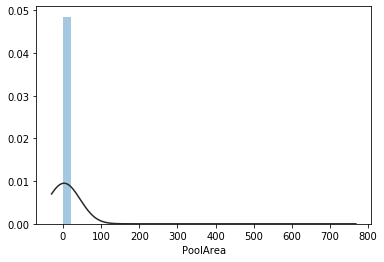

In [15]:
#distribution plot of the only non normal variable
sns.distplot(houses_data["PoolArea"], kde=False, fit=stats.norm)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([  0,   0,   0, ..., 576, 648, 738], dtype=int64)),
 (8.677881463480311, 3.010463378176384, 0.20643876291315735))

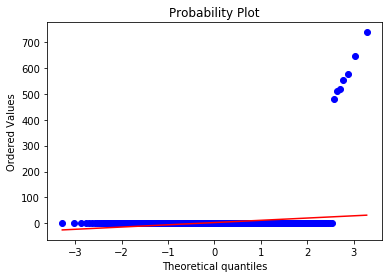

In [16]:
#qq plot to see if the variable is normal
stats.probplot(houses_data["PoolArea"], plot=plt, dist=stats.norm)

In [17]:
#Checking the frequencies of 0s in PoolArea
hd_num["PoolArea"][hd_num["PoolArea"]==0].count()
#There are a lot of 0 because it correspond to houses having no pool.
#The qq-plot seems to have extreme variables because the minimum of the PoolArea is quite far from 0.
#Thus there are not outliers, but only extrame variables given by the absence of the pool (0) or the presence (500)

1331

In [18]:
#Checking also MiscVal
hd_num["MiscVal"][hd_num["MiscVal"]==0].count()

1291

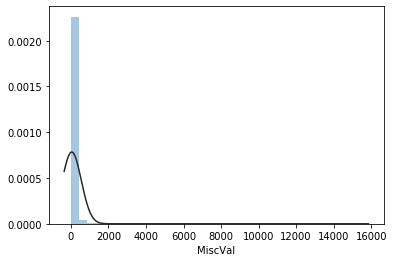

In [19]:
sns.distplot(houses_data["MiscVal"], kde=False, fit=stats.norm)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([    0,     0,     0, ...,  2500,  8300, 15500], dtype=int64)),
 (116.09335513440612, 42.93273542600899, 0.22809849198074644))

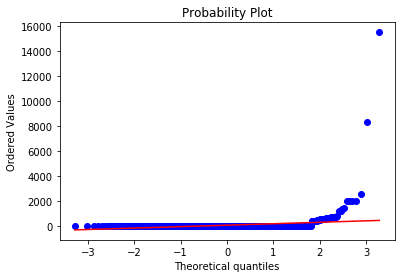

In [20]:
#The graph looks very similar to the Pool Area
stats.probplot(houses_data["MiscVal"], plot=plt, dist=stats.norm)
#For the same reason, i wont drop any value.
#Other variables do show the same pattern

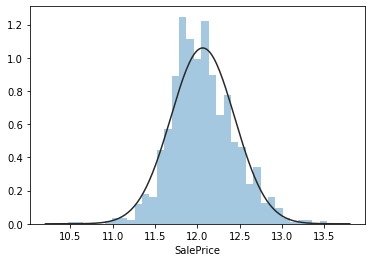

In [21]:
#Checking the distribution of the dependent variable
#It has been applyed a log transformation to the dependent variable to make it more normally distributed
sns.distplot(np.log(houses_data["SalePrice"]), kde=False, fit=stats.norm)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([10.47194981, 10.59663473, 10.93298196, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3751207305544073, 12.063491751285452, 0.9936455996537562))

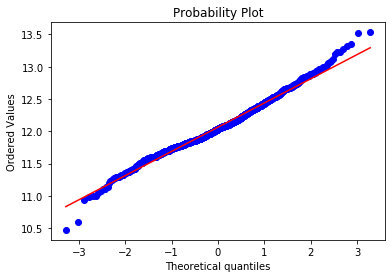

In [22]:
#data seems normal now
stats.probplot(np.log(houses_data["SalePrice"]), plot=plt, dist=stats.norm)

In [26]:
#Checking if SalePrice follows a normal distribution with p-value = 5%
stats.shapiro(np.log(houses_data["SalePrice"]))[0]>=0.05

True

In [27]:
#Database at the end of the manipulations
houses_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,STORY 1946 & NEWER,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,STORY 1946 & NEWER,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,STORY 1945 & OLDER,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,STORY 1946 & NEWER,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,STORY 1946 & NEWER,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,STORY 1946 & NEWER ALL STYLES,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,STORY 1945 & OLDER,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,STORY 1946 & NEWER ALL STYLES,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [28]:
#Splitting the indipendent and the dependent variable
X = houses_data.iloc[:,1:-1]
y = np.log(houses_data.iloc[:,-1])


In [29]:
#X_train contains categorical variables, but regressions takes only numerical variables.
#Convert them to dummies
#list of dummies variables
X_cat = X.dtypes[X.dtypes=="object"].index.values
#create dummies
dummies = pd.get_dummies(X[X_cat],drop_first=True)
#concatneate X with dummies
X=pd.concat([X,pd.get_dummies(X[X_cat],drop_first=True)],axis=1)


In [30]:
#Drop old categorical variables
X=X.drop(X_cat,axis=1)


In [31]:
#Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
#First model LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9780770017431168

In [33]:
# mean squared error will be the metric evaluated
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(reg, X_test, y_test, cv=5,scoring='neg_mean_squared_error'))

-14.126142338042651

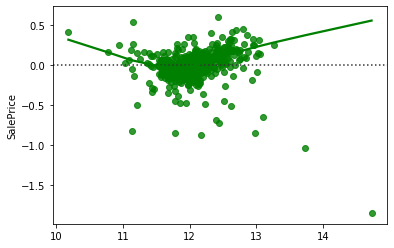

In [34]:
#Studying residuals
import seaborn as sns
y1= reg.predict(X_test)
sns.residplot(y1, y_test, lowess=True, color="g")

C:\Users\UTENTE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\UTENTE\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\UTENTE\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x

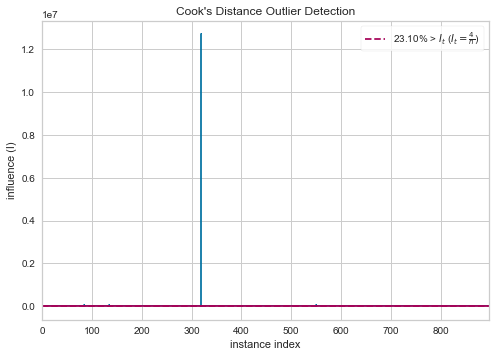

In [35]:
from yellowbrick.regressor import CooksDistance
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()

In [36]:
#Getting possible outliers
visualizer.distance_[visualizer.distance_>3000]

463    5.620081e+03
237    6.923129e+04
595    3.551703e+04
522    3.708834e+03
29     1.269256e+07
531    4.214256e+03
991    2.213860e+04
892    4.987382e+04
172    3.143283e+03
438    3.142860e+03
dtype: float64

In [37]:
#Define very naive z-score to analyse outliers
def z_score(data,level=3):
    z_score=np.absolute((np.mean(X_train)-data)/np.std(X_train))
    return z_score[z_score>level]

In [38]:
z_score(X_train.loc[29,:])

MSSubClass_STORY 1945 & OLDER     3.517547
Neighborhood_BrkSide              5.035170
Condition1_Feedr                  4.818321
Condition2_Norm                   8.582929
Condition2_RRNn                  21.142375
YearBuilt_1927                   21.142375
HeatingQC_Fa                      6.302957
CentralAir_Y                      4.751731
KitchenQual_Fa                    8.241546
GarageYrBlt_1920.0                9.927515
GarageQual_Fa                     5.372771
GarageQual_TA                     4.298635
dtype: float64

In [39]:
z_score(X_train.loc[651,:])

MSSubClass_STORY 1945 & OLDER     3.517547
Neighborhood_Edwards              4.348691
YearBuilt_1940                   10.535654
BsmtExposure_Mn                   3.546231
GarageYrBlt_1940.0               10.535654
GarageQual_Fa                     5.372771
GarageQual_TA                     4.298635
GarageCond_Po                    12.179217
GarageCond_TA                     5.467774
PavedDrive_P                      6.793960
PavedDrive_Y                      4.250156
MoSold_10                         4.070458
dtype: float64

In [40]:
#From the z-score it looks like there aren't outliers, only extreme values.
#This extreme values are generated by variables that assume value 0 or a very high value

In [41]:
#There is a high number of variables, thus lasso could be a solution to reduce it
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
X

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.033420,0.625,0.428571,0.122500,0.125089,0.000000,0.064212,0.125062,0.098260,0.413559,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.038795,0.500,0.857143,0.000000,0.173281,0.000000,0.121575,0.192673,0.193700,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.046507,0.625,0.428571,0.101250,0.086109,0.000000,0.185788,0.135720,0.113305,0.419370,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.038561,0.625,0.428571,0.000000,0.038271,0.000000,0.231164,0.108410,0.122943,0.366102,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.060576,0.750,0.428571,0.218750,0.116052,0.000000,0.209760,0.173189,0.166197,0.509927,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.030929,0.500,0.428571,0.000000,0.000000,0.000000,0.407962,0.141216,0.121063,0.336077,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1334,0.055505,0.500,0.571429,0.074375,0.139972,0.110583,0.252140,0.239301,0.384344,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,0.036187,0.625,1.000000,0.000000,0.048724,0.000000,0.375428,0.174355,0.176305,0.557869,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.039342,0.375,0.571429,0.000000,0.008682,0.698100,0.000000,0.162032,0.150447,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
#Splitting Dataset, do finetuning with Gridsearch and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lasso=linear_model.Lasso()
parameters = {'alpha':[1e-4,1e-3,1e-2,1e-1,1,5,10],
             'max_iter':[1000000]}
lasso_reg = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)
lasso_reg.best_params_

{'alpha': 0.001, 'max_iter': 1000000}

In [43]:
#Number of variables
coef = pd.Series(lasso_reg.best_estimator_.coef_, index = X.columns)
imp_coef = coef.sort_values()
imp_coef = imp_coef[np.absolute(imp_coef)>0]
imp_coef.count()

86

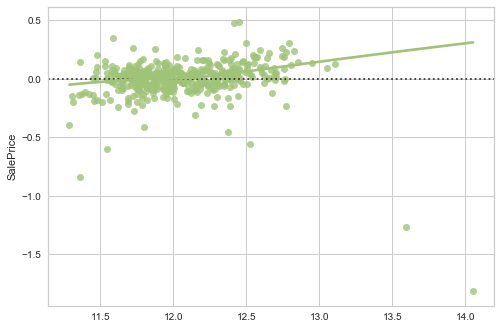

In [44]:
y1= lasso_reg.predict(X_test)
sns.residplot(y1, y_test, lowess=True, color="g")

In [45]:
#evalutating the model with the same metric
np.mean(cross_val_score(lasso_reg, X_test, y_test, cv=5,scoring='neg_mean_squared_error'))

-0.028608498135807146

In [46]:
#Support vector machines
from sklearn import svm
#Support vector machines need to be scaled but i already did it with lasso (even if it wasnt necessary)



In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

clf = svm.SVR(kernel='rbf', gamma='auto', C=1.0)

#It has been run a randomized search to find the best parameters.
#parameters = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
#parameters = {
    #'C': [0.1,1,10,100,1000],
    #'epsilon':[0.01,0.1,1,10],
    #'gamma':['auto','scale'],
    #'kernel':['poly', 'rbf'],
    #'degree':[2,3,4,5,6]
#}

#svm_reg = RandomizedSearchCV(clf,parameters, scoring='neg_mean_squared_error',cv=5,verbose=10,n_jobs=-1)
#RandomizedSearchCV(cv=5, error_score='raise-deprecating',
#                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
#                                 epsilon=0.1, gamma='auto_deprecated',
#                                 kernel='rbf', max_iter=-1, shrinking=True,
#                                 tol=0.001, verbose=False),

In [49]:
clf.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
clf.predict(X_train)

array([11.67654316, 12.63712764, 12.09623773, 11.76813013, 12.00249462,
       11.86586887, 12.04262565, 12.13958713, 12.54077411, 11.80518422,
       11.85792752, 11.82442034, 12.16050208, 12.01754238, 11.88718622,
       12.53017718, 12.3806701 , 12.26461519, 11.99337619, 11.57796886,
       11.76237588, 11.96148005, 12.1292507 , 12.42834521, 11.83754521,
       11.64541469, 12.52209483, 11.78832801, 11.80009738, 11.62357214,
       11.59694633, 11.72941678, 11.99766513, 11.72848374, 12.88843815,
       11.90754113, 12.65507988, 11.93436639, 11.79367398, 11.98372708,
       11.89186462, 12.07152025, 12.70746274, 12.67574449, 11.64625278,
       11.8269376 , 11.75835313, 11.80803505, 11.91672233, 12.56623499,
       12.37104731, 11.44787198, 12.2497352 , 11.80075437, 11.9504872 ,
       12.15500342, 11.45274331, 12.30471334, 12.31578523, 11.62198905,
       11.77748637, 12.28241176, 12.14804762, 11.93417759, 11.86898731,
       11.92212349, 11.87698133, 11.78666375, 12.04951439, 12.25

In [51]:
#Evalutating the model
np.mean(cross_val_score(clf, X_test, y_test, cv=5,scoring='neg_mean_squared_error'))

-0.04130874201171879

In [52]:
# Using random forest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,1000,2000], "criterion":['mse'],
              "min_samples_leaf":[0.1,1],"random_state":[42]}
rf=GridSearchCV(rf, parameters, cv=5)


In [53]:
# Train the model on training data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [54]:
rf.predict(X_train)

array([11.885434  , 12.6315003 , 12.06234993, 11.65718747, 12.01835567,
       11.89832907, 12.07681867, 12.01371482, 12.63218692, 11.75273569,
       11.9232537 , 11.80919912, 12.44871599, 12.0743264 , 11.86080966,
       12.58285417, 12.44877513, 12.2149857 , 11.98818218, 11.50753272,
       11.17749007, 12.06668305, 12.05403166, 12.36274996, 11.76627989,
       11.39318721, 12.29384071, 11.37149495, 11.92458438, 11.63326316,
       11.38907567, 11.48520109, 12.03571884, 11.60593426, 13.0108244 ,
       11.8178154 , 12.5590948 , 11.87602495, 11.84690905, 12.06954776,
       11.88133048, 11.8739062 , 12.75389966, 12.74487445, 11.29946702,
       11.81107273, 11.85986897, 11.82525794, 11.90726762, 12.70963569,
       12.42227363, 11.06504535, 12.16498367, 11.64567644, 11.92447693,
       12.37107686, 10.76963354, 12.4726548 , 12.36066354, 11.43973891,
       11.84502021, 12.13533796, 12.13554251, 11.8989806 , 11.87655254,
       11.90582069, 11.99256999, 11.68902277, 11.90867896, 12.25

In [55]:
#Evalutating the model
np.mean(cross_val_score(rf, X_test, y_test, cv=5,scoring='neg_mean_squared_error'))

-0.025638344327072293

In [56]:
# Multi-layer Perceptron regressor model
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(random_state = 0)
parameters = {'hidden_layer_sizes':[(50,100,500)],"solver":['sgd'],
             'batch_size':[128],
             'learning_rate':['constant'],
             'alpha':10.0**-np.arange(1,3),
             'max_iter':[10000]}
gs=GridSearchCV(regressor, parameters, cv=5, verbose=10,scoring='neg_mean_squared_error')


In [57]:
#Min Max scaler is able to scale the variables the range [0;1]
scaler = MinMaxScaler(feature_range=(0, 1))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data=scaler.fit_transform(X),index=X.index,columns=X.columns), y, test_size=0.33, random_state=42)

In [59]:
gs=gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.049, total=   7.9s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.049, total=   7.9s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.6s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.049, total=   8.4s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.1s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.042, total=   7.3s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.4s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.057, total=   8.6s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.9s remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.049, total=   6.9s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.9s remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.049, total=   7.4s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   54.2s remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.053, total=   6.4s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.0min remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.046, total=   6.2s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 500), learning_rate=constant, max_iter=10000, solver=sgd, score=-0.064, total=   6.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


In [60]:
#Metric Evaluating the model
gs.best_score_

-0.04907576666278138

The best performing model is Random Forest.
Now it is worth to explora little bit the solution:

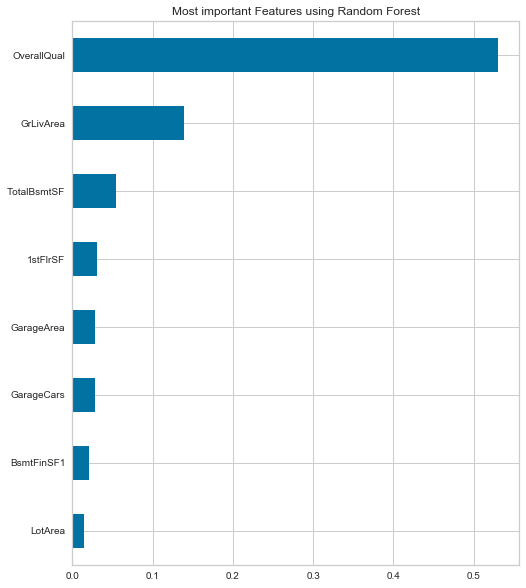

In [62]:
#Displaying the most important features of the RandomForest Model
import matplotlib
coef_forest = pd.Series(rf.best_estimator_.feature_importances_, index = X.columns)
coef_forest=coef_forest.sort_values()[coef_forest.sort_values()>0.01]
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef_forest.plot(kind = "barh",title="Most important Features using Random Forest")


In [63]:
#Displaying the exact numberical value
coef_forest

LotArea        0.014182
BsmtFinSF1     0.020762
GarageCars     0.027581
GarageArea     0.028310
1stFlrSF       0.030538
TotalBsmtSF    0.053708
GrLivArea      0.139269
OverallQual    0.529770
dtype: float64

# Conclusions


The most important variables can be divided into two categories:
- **Linked To the Area of the Building**
<br>*GrLivArea*: above ground living area.
<br>*1stFlrSF*: First floor Area.
<br>*TotalBsmtSF*: Area of the Basement.
<br>*GarageCars*: garage Area in terms of cars capacity
<br>*GarageArea*:Size of garage in square feet

- **Linked Quality of the Building**
<br>*OverallQual*: Rates the overall material and finish of the house

The most important feature by far (0.53) is the materials' quality of the apartament.